## `` DATA IMPORTATION``

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from   MRPy import MRPy
import numpy as np
import scipy.integrate as integrate
import gzip   as gz
import scipy as sc

 -------------------------------------------------- 
  Estimated Dumping ratio is:                 1.6% 
 --------------------------------------------------


C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [ 1.17778778e-04, -4.00000000e+01,  2.00000000e+00, ...,
         1.91000000e+02,  3.28000000e+02,  7.00000000e+01],
       [ 1.41327381e-02,  1.66000000e+02, -5.80000000e+01, ...,
         2.03000000e+02,  3.97000000e+02,  6.00000000e+00],
       ...,
       [ 1.79467092e+01,  1.30000000e+02, -5.80000000e+01, ...,
         1.98000000e+02,  3.47000000e+02,  1.70000000e+01],
       [ 1.79638608e+01,  2.04000000e+02, -3.40000000e+01, ...,
         2.23000000e+02,  3.79000000e+02,  4.70000000e+01],
       [ 1.79795289e+01,  1.68000000e+02, -1.16000000e+02, ...,
         1.89000000e+02,  3.53000000e+02,  1.80000000e+01]])

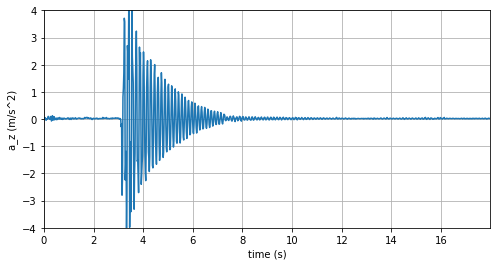

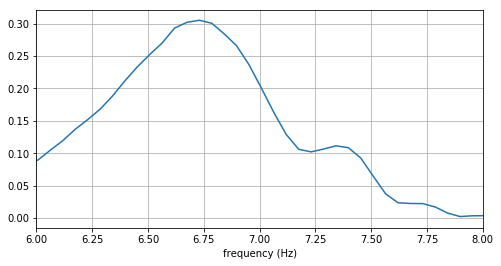

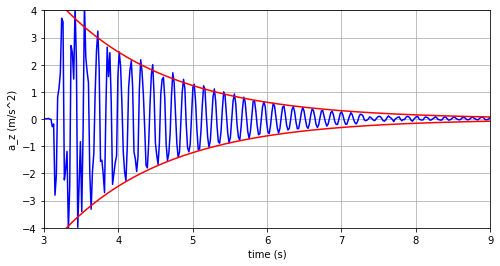

In [5]:
#==============================================#
#1. IMPORTING SIGNALS FROM RESOURCES FOLDER    #
#==============================================#

filename1='Resources/2019-11-18__15-15-18'
filename2='Resources/2019-11-18__15-27-47'
filename3='Resources/2019-11-18__15-28-37'
filename4='Resources/2019-11-18__16-04-12'
filename5='Resources/2019-11-18__16-03-19'
filename6='Resources/2019-11-18__16-02-42'
filename7='Resources/2019-11-18__16-04-44'
filename8='Resources/2019-11-18__17-18-21'
filename9='Resources/2019-11-18__17-19-57'
filename10='Resources/2019-12-04__17-05-08'
filename11='Resources/2019-12-04__17-05-52'
filename12='Resources/2019-12-04__17-05-52'


#==============================================#
#2. OPENING '.gz' FILES WITH MRPy CODES        #
#==============================================#
with gz.open(filename4+'.csv.gz', 'rb') as target:
    data =  np.genfromtxt(target, 
                          delimiter=',')
    ti   =  data[1:,0] - data[1,0]
    
a=MRPy.from_resampling(ti, data[1:,1:]/8096)    ## Using MRPy to resample the datas with constant time steps.


#==============================================#
#3. PLOTING ACCELERATION                       # 
#==============================================#
az   = MRPy(a[0], a.fs)                         
t    = a.t_axis()

plt.figure(4, figsize=(8, 4), clear=True)
plt.plot(t, az[0])                         
plt.xlim(0, az.Td);  plt.xlabel('time (s)') 
plt.ylim(-4, 4);
plt.ylabel('a_z (m/s^2)') 

plt.grid(True) 

#=============================================#
#4. PLOTING PERIODOGRAM WITH MRPy             #
#=============================================#
Saz, fs = az.periodogram()
f       = az.f_axis()

plt.figure(5, figsize=(8, 4), clear=True)
plt.plot(f, Saz[0])

plt.xlim(6, 8);   plt.xlabel('frequency (Hz)') 
#plt.ylim(0,  5);   plt.ylabel('S_az (power)') 
f_max1 =f[Saz[0].argmax()]

plt.grid(True) 
#==============================================#
#5. ESTIMATING DUMPING RATIO                   #
#==============================================#

dt = t[1]-t[0]
r1 = 4
r2 = 8
r_mid =int((r1+r2)/2)

x1 = int(r1/dt)
x_mid = int(r_mid/dt)
x2 = int(r2/dt)

l1 = np.linspace(r1,r_mid,1/dt)
l2 = np.linspace(r_mid,r2,1/dt)
n1 =l1[az[0,x1:x_mid].argmax()]
n2 =l2[az[0,x_mid:x2].argmax()] 
T = 1/f_max1
N = int((n2-n1)/T)

zeta = np.log(np.max(az[0,x1:x_mid])/np.max(az[0,x_mid:x2]))/(2*np.pi*N)

print(" --------------------------------------------------",'\n',
      ' Estimated Dumping ratio is:               {0:5.1f}%'.format(zeta*100),'\n',
      "--------------------------------------------------")

exp = np.max(az[0,x1:x2])*np.exp(-zeta*f_max1*2*np.pi*(t-r1))
                           
plt.figure(6, figsize=(8, 4), clear=True)
                           
plt.plot(t, az[0],'b')
plt.plot(t,exp,'r',t,-exp,'r')
plt.xlim(r1-1, r2+1);  plt.xlabel('time (s)') 
plt.ylim(-4, 4);
plt.ylabel('a_z (m/s^2)') 

plt.grid(True) 
data

Now, the same procedure will be used to plot others acquired samples

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


 -------------------------------------------------- 
  Estimated Dumping ratio is:                 2.0% 
 --------------------------------------------------


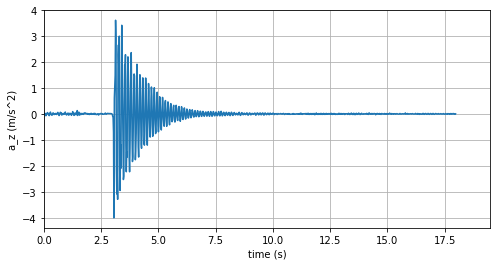

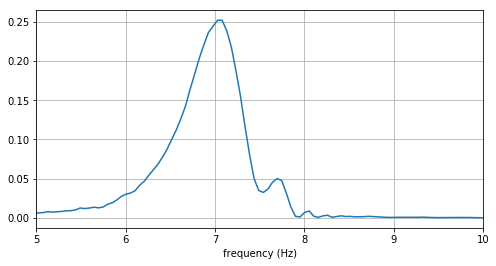

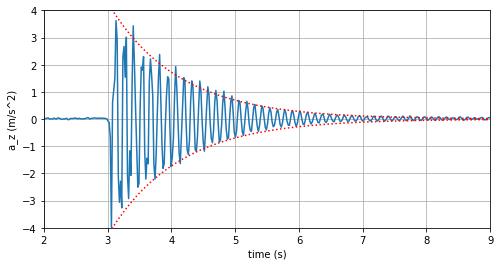

In [211]:
with gz.open(filename6+'.csv.gz', 'rb') as target:
    data =  np.genfromtxt(target, 
                          delimiter=',')
    ti   =  data[1:,0] - data[1,0]
    
a=MRPy.from_resampling(ti, data[1:,1:]/8096)

az2   = MRPy(a[0], a.fs)
t2    = a.t_axis()

plt.figure(4, figsize=(8, 4), clear=True)
plt.plot(t, az2[0])

plt.xlim(0, az2.Td);  plt.xlabel('time (s)') 
#plt.ylim(-15, 15);
plt.ylabel('a_z (m/s^2)') 

plt.grid(True) 


Saz2, fs2 = az2.periodogram()
f2       = az2.f_axis()

plt.figure(5, figsize=(8, 4), clear=True)
plt.plot(f2, Saz2[0])

plt.xlim(5, 10);   plt.xlabel('frequency (Hz)') 
#plt.ylim(0,  5);   plt.ylabel('S_az (power)') 

plt.grid(True) 


# MAKING TESTS #################
f_max2 =f2[Saz2[0].argmax()]
dt = t[1]-t[0]
r1 = 3
r2 = 8
r_mid =int((r1+r2)/2)

x1 = int(r1/dt)
x_mid = int(r_mid/dt)
x2 = int(r2/dt)

l1 = np.linspace(r1,r_mid,1/dt)
l2 = np.linspace(r_mid,r2,1/dt)
n1 =l1[az2[0,x1:x_mid].argmax()]
n2 =l2[az2[0,x_mid:x2].argmax()] 
T = 1/f_max2
N = int((n2-n1)/T)

zeta = np.log(np.max(az2[0,x1:x_mid])/np.max(az2[0,x_mid:x2]))/(2*np.pi*N)

print(" --------------------------------------------------",'\n',
      ' Estimated Dumping ratio is:               {0:5.1f}%'.format(zeta*100),'\n',
      "--------------------------------------------------")

exp = np.max(az[0,x1:x2])*np.exp(-zeta*f_max2*2*np.pi*(t-r1))
                           
plt.figure(6, figsize=(8, 4), clear=True)
                           
plt.plot(t, az2[0])
plt.plot(t,exp,'r:',t,-exp,'r:')
plt.xlim(r1-1, r2+1);  plt.xlabel('time (s)') 
plt.ylim(-4, 4);
plt.ylabel('a_z (m/s^2)') 

plt.grid(True) 



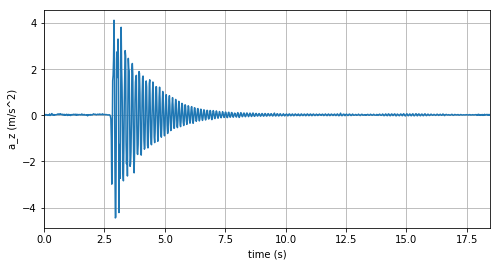

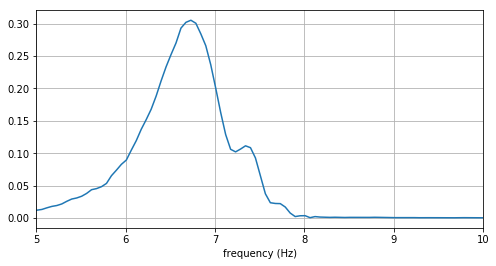

In [71]:
with gz.open(filename7+'.csv.gz', 'rb') as target:
    data =  np.genfromtxt(target, 
                          delimiter=',')
    ti   =  data[1:,0] - data[1,0]
    
a=MRPy.from_resampling(ti, data[1:,1:]/8096)

az3   = MRPy(a[0], a.fs)
t3    = a.t_axis()

plt.figure(4, figsize=(8, 4), clear=True)
plt.plot(t3, az3[0])

plt.xlim(0, az3.Td);  plt.xlabel('time (s)') 
#plt.ylim(-15, 15);
plt.ylabel('a_z (m/s^2)') 

plt.grid(True) 


Saz3, fs3 = az.periodogram()
f3       = az.f_axis()

plt.figure(5, figsize=(8, 4), clear=True)
plt.plot(f3, Saz3[0])

plt.xlim(5, 10);   plt.xlabel('frequency (Hz)') 
#plt.ylim(0,  5);   plt.ylabel('S_az (power)') 

plt.grid(True) 

In [72]:
#======================================================================#
# 6. EXPORTING ACCELERATION AND PERIODOGRAM TO BE USED ON MAIN PROGRAM #
#======================================================================#
import pickle as pk
with open('sample_freq.pk', 'wb') as target:
    pk.dump((az, t, Saz, f,az2, t2, Saz2, f2,az3, t3, Saz3, f3), target)